# Sesi 8

Advance Visualization

In [83]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
df_can = pd.read_csv('dataCanada.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
1,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
2,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
3,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
4,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [3]:
# set index to country
df_can.set_index('Country', inplace=True)

# make list of years
years = list(map(str, range(1980, 2014)))

df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [47]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

## Waffle Charts

In [34]:
# create dataframe for denmark, norway, and sweden
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [35]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_prop = [(float(value)/total_values) for value in df_dsn['Total']]

#print out proportions
for i, proportion in enumerate(category_prop):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [36]:
# measure size of waffle chart
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [37]:
# compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_prop]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [38]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define the default value
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
        
print('Waffle chart populated!')

Waffle chart populated!


In [39]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

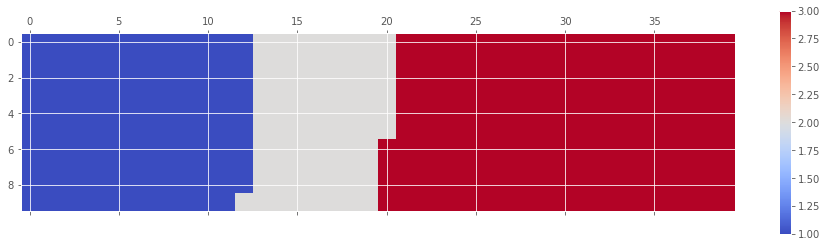

In [41]:
# instantiate a new figure object
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

<Figure size 432x288 with 0 Axes>

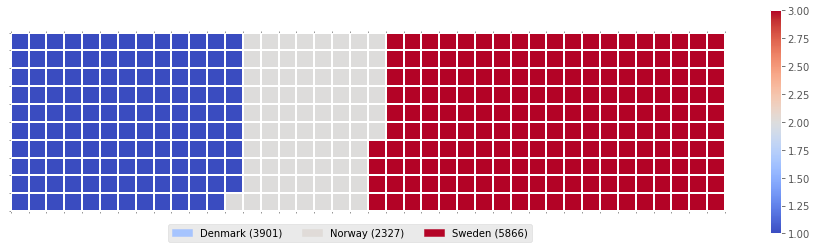

In [73]:
# instantiate a new figure object
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
#add legend
    plt.legend(
        handles=legend_handles,
        loc = 'lower center',
        ncol=len(df_dsn.index.values),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [74]:
# create waffle function
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    # compute the proportion
    total_values = sum(df_dsn['Total'])
    category_prop = [(float(value)/total_values) for value in df_dsn['Total']]
    
    # count total tiles
    total_num_tiles = width * height
    print('Total number of tiles is ', total_num_tiles)
    
    # compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_prop]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ': ' + str(tiles))
        
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define the default value
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1

            waffle_chart[row, col] = category_index
            
    # instantiate a new figure object
    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    #compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(df_dsn['Total'])
    total_values = values_cumsum[len(values_cumsum) - 1]

    #create legend
    legend_handles = []
    for i, category in enumerate(categories):
        label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
        
    #add legend
    plt.legend(
        handles=legend_handles,
        loc = 'lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )


In [79]:
width = 60
height = 20

categories = df_dsn.index.values
values = df_dsn['Total']

colormap = plt.cm.coolwarm

Total number of tiles is  1200
Denmark: 387
Norway: 231
Sweden: 582


<Figure size 432x288 with 0 Axes>

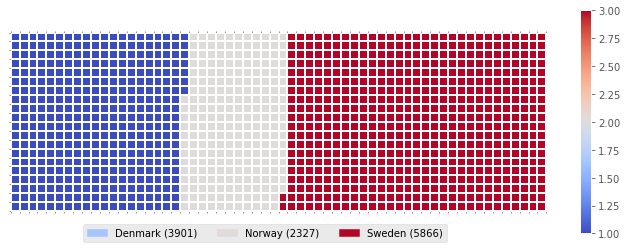

In [80]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Cloud

In [5]:
!pip install wordcloud

In [6]:
# wordcloud to visualization
# eliminate the general words that has no meaning like a, is, the, and

from wordcloud import WordCloud, STOPWORDS

In [7]:
alice_novel = open('dataset/alice_novel.txt', 'r').read()

In [8]:
alice_novel

'ï»¿Project Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what

In [9]:
stopwords = set(STOPWORDS)

In [10]:
alice_wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=2000
)

alice_wc.generate(alice_novel)

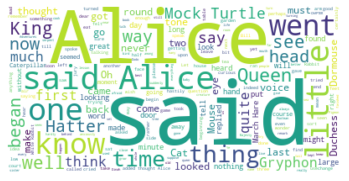

In [11]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

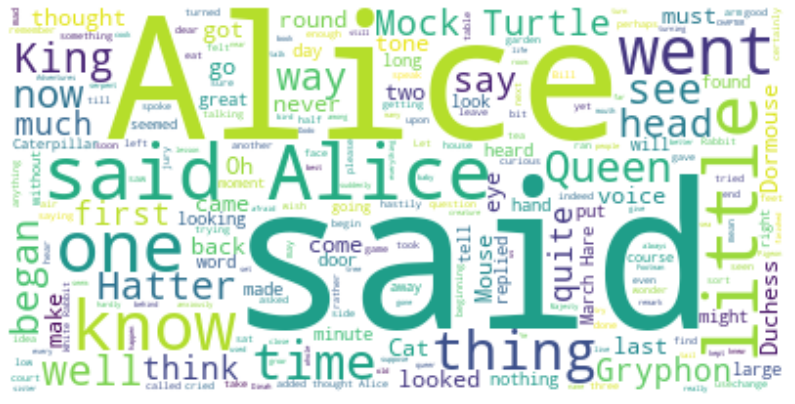

In [12]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

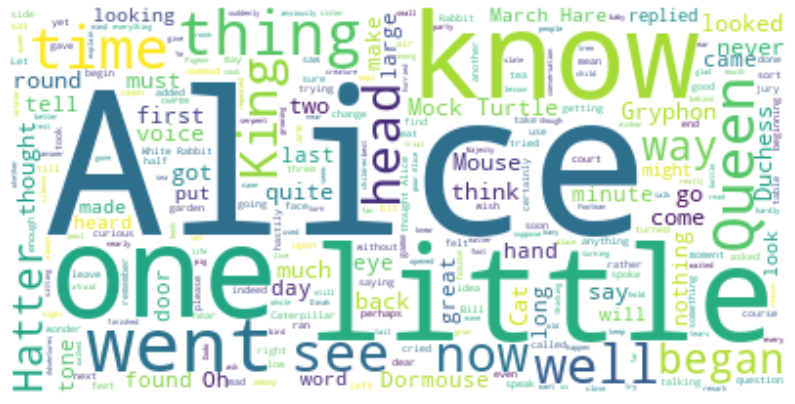

In [13]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

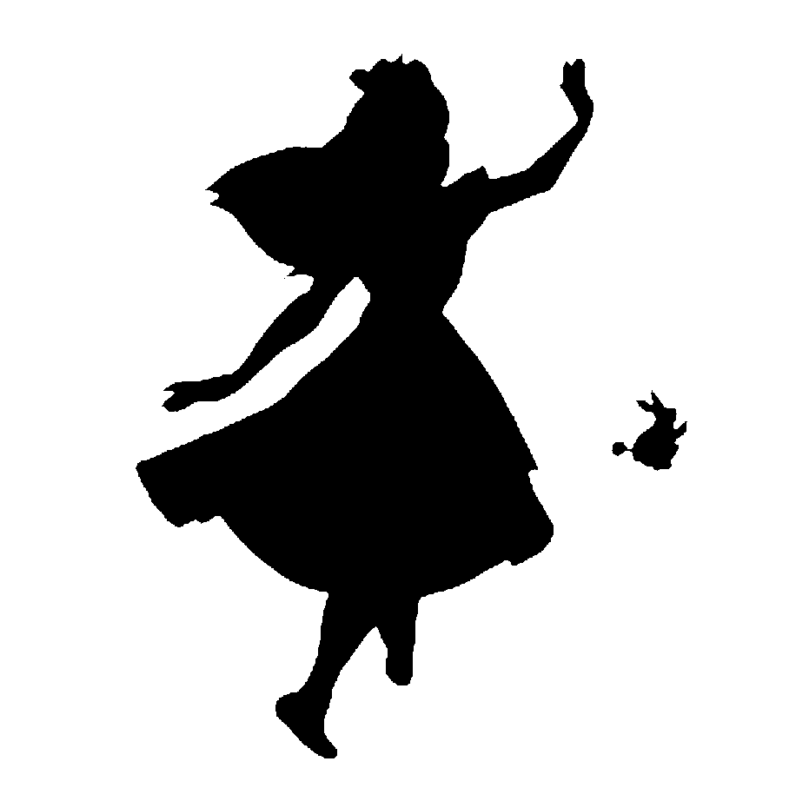

In [91]:
# wordcloud in image
alice_mask = np.array(Image.open('dataset/alice_mask.png'))

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

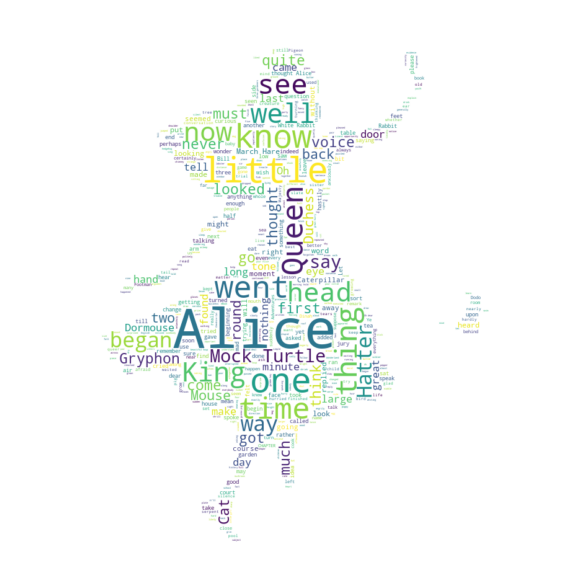

In [93]:
#instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [94]:
# Word Cloud on Canada data
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [95]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [97]:
max_words = 100
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
word_string

'India India India India India India India India India India China China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia Iraq Algeria Israel Bangladesh '

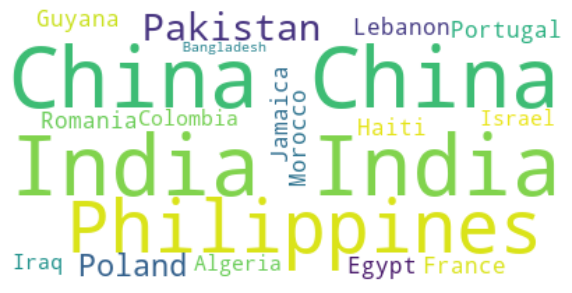

In [100]:
#create word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plots

In [14]:
!pip install seaborn

In [15]:
import seaborn as sns

In [16]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [17]:
df_tot.index = map(int, df_tot.index)

In [18]:
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']

In [19]:
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


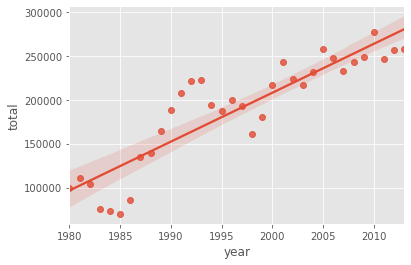

In [20]:
ax = sns.regplot(x='year', y='total', data=df_tot)

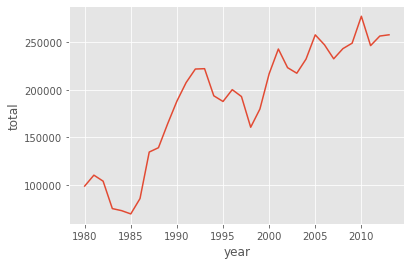

In [21]:
ax = sns.lineplot(x='year', y='total', data=df_tot)

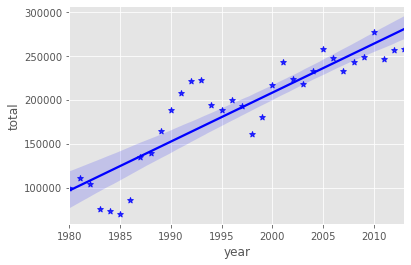

In [22]:
ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_tot, 
                 color='blue', 
                 marker='*')

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Total Immigration')]

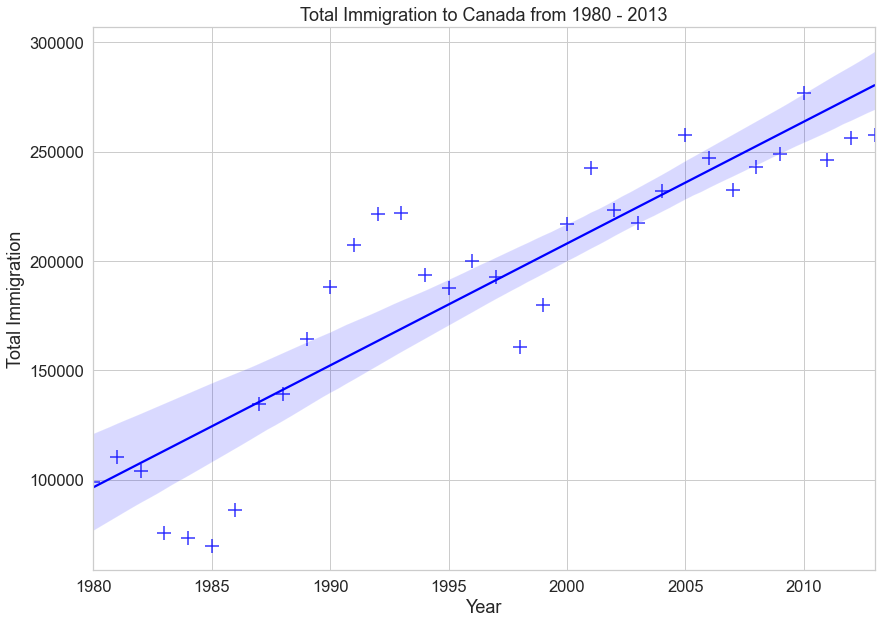

In [111]:
plt.figure(figsize=(14, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_tot, 
                 color='blue', 
                 marker='+',
                scatter_kws={'s': 200})

ax.set_title('Total Immigration to Canada from 1980 - 2013')
ax.set(xlabel='Year',
      ylabel='Total Immigration')



In [112]:
# Scatter plot of Denmark, Sweden and Norway

df_dsn.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [114]:
df_country = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_country.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [120]:
# sum immigration from the country each year
df_total = pd.DataFrame(df_country.sum(axis=1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [124]:
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']

In [125]:
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [126]:
# change year string type into int
df_total['year'] = df_total['year'].astype(int)

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Total Immigration')]

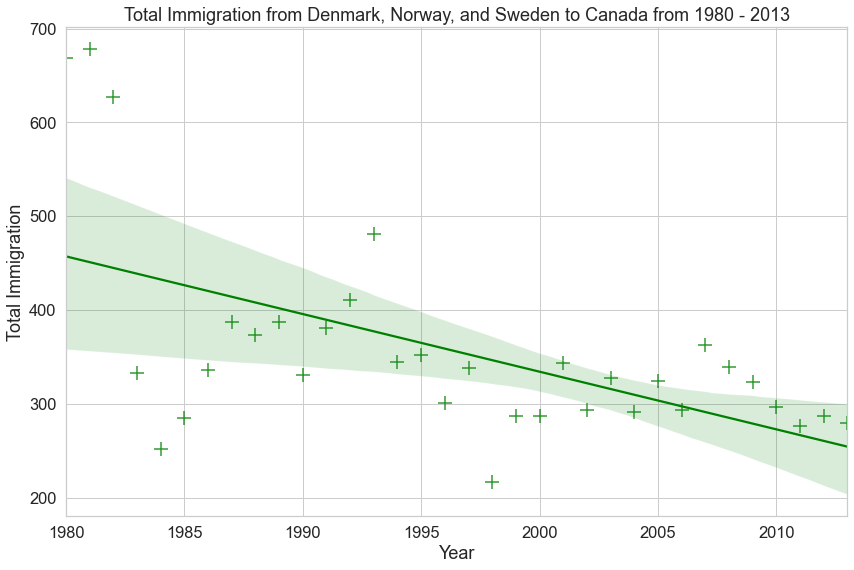

In [127]:
plt.figure(figsize=(14, 9))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})
ax.set_title('Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
ax.set(xlabel='Year',
      ylabel='Total Immigration')

## Folium

In [23]:
!pip install folium

In [24]:
import folium

In [25]:
world_map = folium.Map()

In [26]:
world_map

In [27]:
world_map = folium.Map(location=[-7.7520153,110.4892787], zoom_start=14)

world_map

In [28]:
hacktiv8_map = folium.Map(location=[-6.2607134,106.7794275], 
                          zoom_start=15,
                         tiles='Stamen Toner')

hacktiv8_map

In [29]:
hacktiv8_map = folium.Map(location=[-6.2607134,106.7794275], 
                          zoom_start=15)

hacktiv8_map

In [30]:
hacktiv8_map = folium.Map(location=[-6.2607134,106.7794275], 
                          zoom_start=15,
                         tiles='Stamen Terrain')

hacktiv8_map

## Maps with Marker

In [130]:
df_incidents = pd.read_csv('dataset/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [131]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [132]:
df_incidents.shape

(150500, 13)

In [133]:
df_incidents = df_incidents.iloc[0:100, :]

In [134]:
df_incidents.shape

(100, 13)

In [135]:
latitude = 37.77
longitude = -122.42

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [136]:
sanfran_map

In [137]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
sanfran_map.add_child(incidents)

In [138]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incidents)

In [140]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
    ).add_to(sanfran_map)

sanfran_map

In [1]:
from folium import plugins

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
            location = [lat, lng],
            popup=label,
            icon=None,
    ).add_to(incidents)

sanfran_map

NameError: name 'folium' is not defined